In [8]:
import mne

subject = 'sub-03'
subjects_dir = '/data/users2/mjafarlou1/freesurfer/subjects'

src = mne.setup_source_space(subject, spacing='oct4', add_dist='patch', subjects_dir=subjects_dir)
print(src)


Setting up the source space with the following parameters:

SUBJECTS_DIR = /data/users2/mjafarlou1/freesurfer/subjects
Subject      = sub-03
Surface      = white
Octahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/lh.white...
Mapping lh sub-03 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 258/174110 selected to source space (oct = 4)

Loading /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/rh.white...
Mapping rh sub-03 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 258/177690 selected to source space (oct = 4)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /data/users2/mjafarlou1/freesurfer/subjects
Subject      = sub-03
Surface      = white
Octahedron subdivision grade 4

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/lh.white...
Mapping lh sub-03 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 258/174110 selected to source space (oct = 4)

Loading /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/rh.white...
Mapping rh sub-03 -> oct (4) ...
    Triangle neighbors and vertex normals...
Loading geometry from /data/users2/mjafarlou1/freesurfer/subjects/sub-03/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 258/177690 selected to source space (oct = 4)

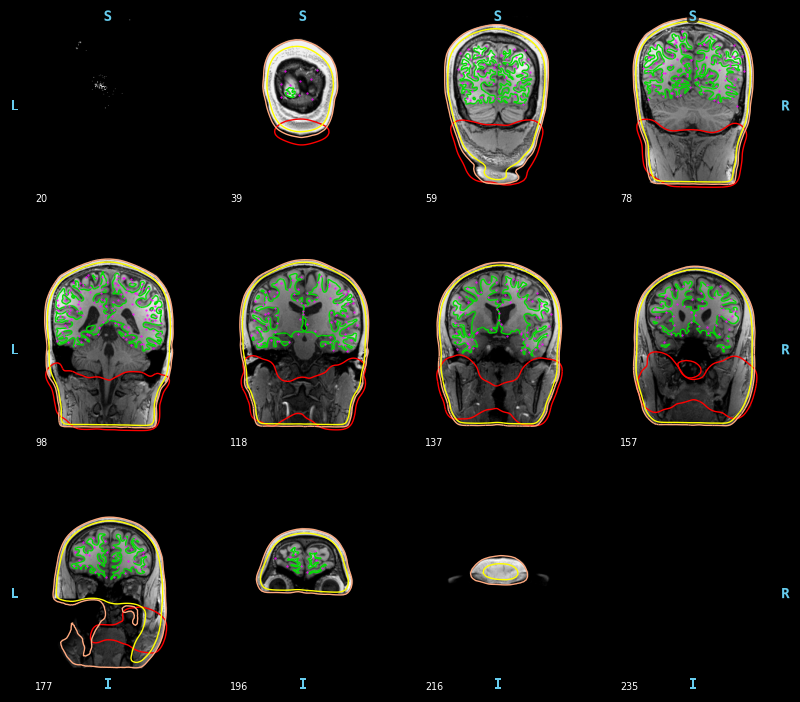

In [9]:
import os

# Set the SUBJECTS_DIR environment variable
subjects_dir = '/data/users2/mjafarlou1/freesurfer/subjects'
os.environ['SUBJECTS_DIR'] = subjects_dir

# Rest of your code...
subject = 'sub-03'
src = mne.setup_source_space(subject, spacing='oct4', add_dist='patch', subjects_dir=subjects_dir)

plot_bem_kwargs = dict(
    brain_surfaces='white',  # Specify the color of the brain surfaces
    src=src,  # Provide the source space
    show=True  # Display the plot
)

mne.viz.plot_bem(subject=subject, **plot_bem_kwargs)


Sphere                : origin at (0.0 0.0 40.0) mm
              radius  : 90.0 mm
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /data/users2/mjafarlou1/freesurfer/subjects/sub-03/mri/T1.mgz

Reading /data/users2/mjafarlou1/freesurfer/subjects/sub-03/mri/T1.mgz...

Setting up the sphere...
Surface CM = (   0.0    0.0   40.0) mm
Surface fits inside a sphere with radius   90.0 mm
Surface extent:
    x =  -90.0 ...   90.0 mm
    y =  -90.0 ...   90.0 mm
    z =  -50.0 ...  130.0 mm
Grid extent:
    x =  -95.0 ...   95.0 mm
    y =  -95.0 ...   95.0 mm
    z =  -50.0 ...  135.0 mm
57798 sources before omitting any.
24365 sources after omitting infeasible sources not within 0.0 - 90.0 mm.
20377 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -95.00 mm
     0.000000  0.005000  0.000000  

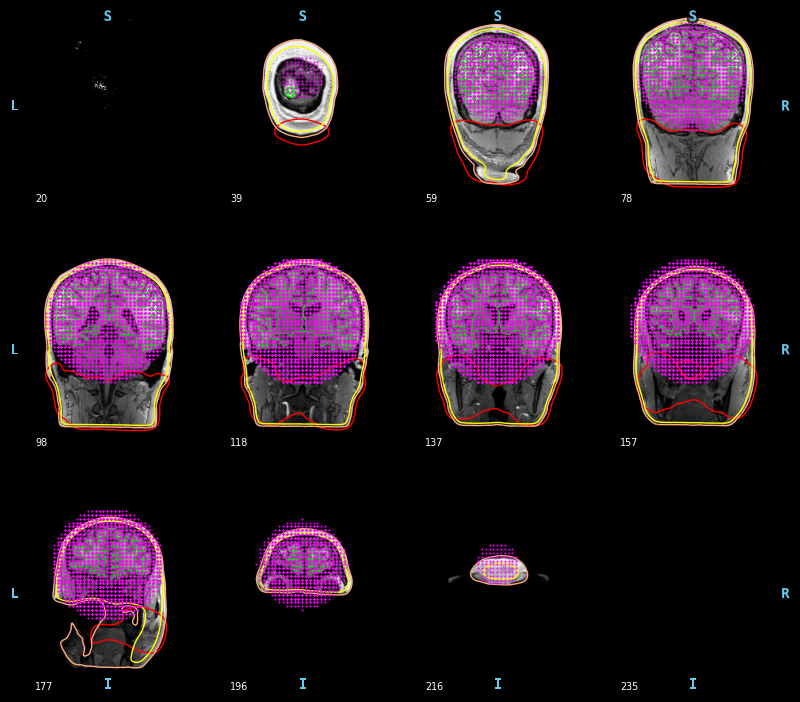

In [10]:
sphere = (0.0, 0.0, 0.04, 0.09)
vol_src = mne.setup_volume_source_space(
    subject,
    subjects_dir=subjects_dir,
    sphere=sphere,
    sphere_units="m",
    add_interpolator=False,
)  # just for speed!
print(vol_src)

# Remove the duplicate argument for 'src' from plot_bem_kwargs
plot_bem_kwargs.pop('src', None)

# Make sure to provide the 'subject' argument when calling plot_bem()
mne.viz.plot_bem(subject=subject, src=vol_src, **plot_bem_kwargs)


Boundary surface file : /data/users2/mjafarlou1/freesurfer/subjects/sub-03/bem/inner_skull.surf
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /data/users2/mjafarlou1/freesurfer/subjects/sub-03/mri/T1.mgz

Reading /data/users2/mjafarlou1/freesurfer/subjects/sub-03/mri/T1.mgz...

Loaded bounding surface from /data/users2/mjafarlou1/freesurfer/subjects/sub-03/bem/inner_skull.surf (10242 nodes)
Surface CM = (   1.7  -10.2  -48.5) mm
Surface fits inside a sphere with radius   97.0 mm
Surface extent:
    x =  -82.1 ...   85.5 mm
    y =  -95.9 ...   57.4 mm
    z = -105.1 ...   -0.5 mm
Grid extent:
    x =  -85.0 ...   90.0 mm
    y = -100.0 ...   60.0 mm
    z = -110.0 ...   -5.0 mm
26136 sources before omitting any.
21440 sources after omitting infeasible sources not within 0.0 - 97.0 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface and at least    5.0 mm away (will take a few...)
Checking surface interior st

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found  2792/12491 points outside using solid angles
    Total 9788/21440 points inside the surface
Interior check completed in 49568.1 ms
    11652 source space points omitted because they are outside the inner skull surface.
    2653 source space points omitted because of the    5.0-mm distance limit.
7135 sources remaining after excluding the sources outside the surface and less than    5.0 mm inside.
Adjusting the neighborhood info.
Source space : MRI voxel -> MRI (surface RAS)
     0.005000  0.000000  0.000000     -85.00 mm
     0.000000  0.005000  0.000000    -100.00 mm
     0.000000  0.000000  0.005000    -110.00 mm
     0.000000  0.000000  0.000000       1.00
MRI volume : MRI voxel -> MRI (surface RAS)
    -0.001000  0.000000  0.000000     128.00 mm
     0.000000  0.000000  0.001000    -128.00 mm
     0.000000 -0.001000  0.000000     128.00 mm
     0.000000  0.000000  0.000000       1.00
MRI volume : MRI (surface RAS) -> RAS (non-zero origin)
     1.000000  0.000000  0.00000

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.5s finished


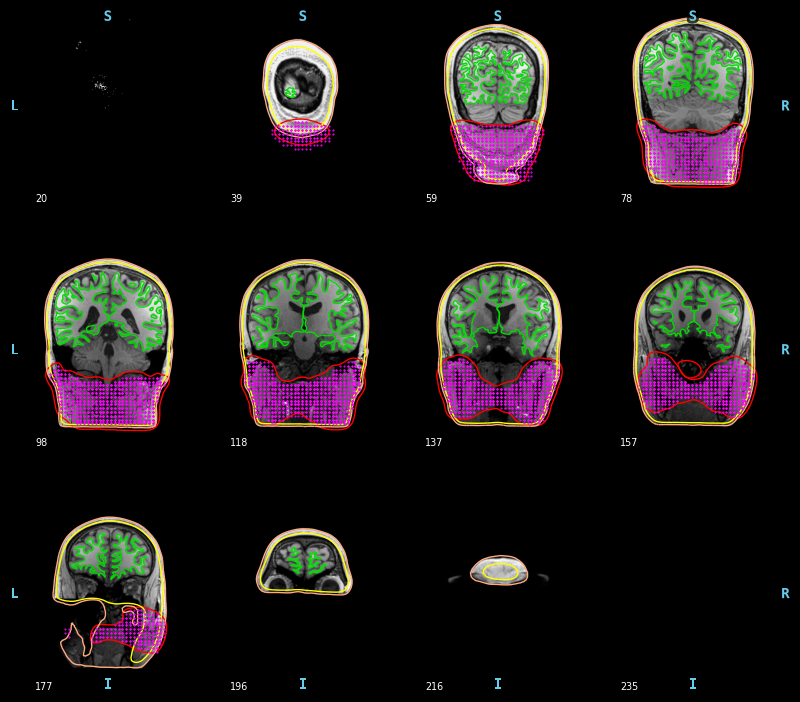

In [13]:
from pathlib import Path

subjects_dir = Path(subjects_dir)
subject = Path(subject)

surface = subjects_dir / subject / "bem" / "inner_skull.surf"
vol_src = mne.setup_volume_source_space(
    subject, subjects_dir=subjects_dir, surface=surface, add_interpolator=False
)  # Just for speed!
print(vol_src)

# Remove the duplicate argument for 'src' from plot_bem_kwargs
plot_bem_kwargs.pop('src', None)

# Make sure to provide the 'subject' argument when calling plot_bem()
mne.viz.plot_bem(subject=subject, src=vol_src, **plot_bem_kwargs)


In [17]:
#print(vol_src)

# Remove the duplicate argument for 'src' from plot_bem_kwargs
#plot_bem_kwargs.pop('src', None)

fig = mne.viz.plot_alignment(
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces="white",
    coord_frame="mri",
    src=vol_src,
)
mne.viz.set_3d_view(
    fig,
    azimuth=173.78,
    elevation=101.75,
    distance=0.30,
    focalpoint=(-0.03, -0.01, 0.03),
)


RuntimeError: Cannot connect to a valid display

In [18]:
###Compute forward solution


conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(
    subject="sub-03", ico=4, conductivity=conductivity, subjects_dir=subjects_dir
)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is   1.69 -10.17 -48.52 mm
Surfaces passed the basic topology checks.
Complete.

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [22]:
raw_fname = "/data/users2/nshor/Multiband_with_MEG/sub-03/meg/sub-03_task-RDR_run-37_meg.fif"

trans_fname = "/data/users2/mjafarlou1/results/coregistration/sub-03/sub-03_task-RDR_run-37_meg-trans.fif"

trans = mne.read_trans(trans_fname)

fwd = mne.make_forward_solution(
    raw_fname,
    trans=trans,
    src=src,
    bem=bem,
    meg=True,
    eeg=False,
    mindist=5.0,
    n_jobs=None,
    verbose=True,
)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=174110, n_used=258>, <surface (rh), n_vertices=177690, n_used=258>] MRI (surface RAS) coords, subject 'sub-03', ~32.3 MB>
MRI -> head transform : instance of Transform
Measurement data      : sub-03_task-RDR_run-37_meg.fif
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 516 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.998113  0.016156 -0.059239      -4.01 mm
     0.001819  0.956559  0.291532       4.91 mm
     0.061375 -0.291090  0.954725      -1.71 mm
     0.000000  0.000000  0.000000       1.00

Read 306 MEG channels from info
105 coil definitions read
Coordinate transformation: MEG device -> head
     0.997320 -0.037118 -0.063057      -5.34 mm
     0.040614  0.997655  0.055102       3.72 mm
     0.060864 -0.057515  0.996488      54.53 mm
     0.000000  0.00000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


    Total 0/258 points inside the surface
Interior check completed in 249.8 ms
    258 source space points omitted because they are outside the inner skull surface.
    Computing patch statistics...
    Patch information added...
Checking surface interior status for 258 points...
    Found   0/258 points inside  an interior sphere of radius   13.8 mm
    Found 187/258 points outside an exterior sphere of radius   96.8 mm
    Found  71/ 71 points outside using surface Qhull


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found   0/  0 points outside using solid angles
    Total 0/258 points inside the surface
Interior check completed in 235.1 ms
    258 source space points omitted because they are outside the inner skull surface.
    Computing patch statistics...
    Patch information added...

Checking surface interior status for 306 points...
    Found   0/306 points inside  an interior sphere of radius   13.8 mm
    Found 306/306 points outside an exterior sphere of radius   96.8 mm
    Found   0/  0 points outside using surface Qhull


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found   0/  0 points outside using solid angles
    Total 0/306 points inside the surface
Interior check completed in 235.3 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


RuntimeError: No points left in source space after excluding points close to inner skull.

In [ ]:
print(f"Before: {src}")
print(f'After:  {fwd["src"]}')

In [ ]:
leadfield = fwd["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

In [ ]:
fwd_fixed = mne.convert_forward_solution(
    fwd, surf_ori=True, force_fixed=True, use_cps=True
)
leadfield = fwd_fixed["sol"]["data"]
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)